<a href="https://colab.research.google.com/github/vvrgit/AI/blob/main/SimpleLinearRegression_AITrack_SampleData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

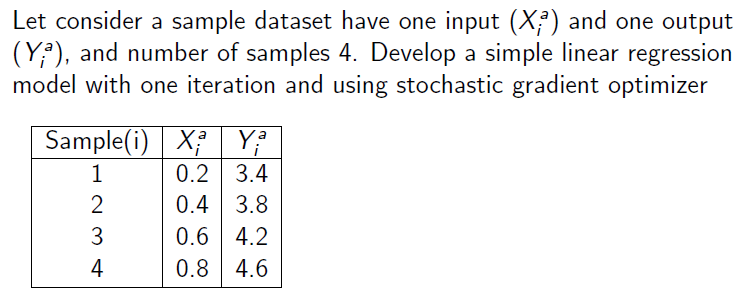

## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import required libraries

In [2]:
import numpy as np
import math as mt
import random
import pandas as pd

## Import Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/AI Data/sampledata.csv')
data.head()

,X,Y
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['X'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Y'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['X'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Y'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['X', 'Y']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['X', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_6, *['Y', 'count()', None], **{})
chart

## *Outliers Treatment*

In [4]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [5]:
sample_outliers_X = detect_outliers_zscore(data['X'])
sample_outliers_Y = detect_outliers_zscore(data['Y'])
print("Outliers in X column from Z-scores method: ", sample_outliers_X)
print("Outliers in Y column from Z-scores method: ", sample_outliers_Y)

Outliers in X column from Z-scores method:  []
Outliers in Y column from Z-scores method:  []


## Missing Values Treatment

In [6]:
print(data.isnull().sum())

X    0
Y    0
dtype: int64


In [7]:
m1=data['X'].mean()
m2=data['Y'].mean()
data['X'].fillna(value=m1, inplace=True)
data['Y'].fillna(value=m2, inplace=True)
data

,X,Y
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


## Data Split

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.20, random_state = 10)

## `Initialization`

In [9]:
m=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.9
max_iter=10000

## Gradient Calculation

In [10]:
def gradient(m,c,x,y):
  m_deriv=-1*(y-m*x-c)*x
  c_deriv=-1*(y-m*x-c)
  return m_deriv,c_deriv

## Training Using Stochastic Gradient Descent Optimizer

In [11]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m,del_c=gradient(m, c, x_train.iloc[sample], y_train.iloc[sample])
    m=m-eta*del_m
    c=c-eta*del_c
print('model parameter m and c',m,c)

model parameter m and c 2.0 3.0


# Model Prediction on Training Data





In [12]:
y_pred_train = []
for i in x_train:
  y_p_tr = (m * i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)

# Model Prediction on Testing Data

In [13]:
y_pred_test = []
for i in x_test:
  y_p_te = (m * i) + c
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)

# Error Metrics Calculation

In [14]:

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('Root mean square error', rmse)
mse = (mean_squared_error(y_train, y_pred_train))
print('Mean square error', mse)
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 0.0
Mean square error 0.0
Mean absolute error 0.0


In [15]:
#Testing Accuracies
mse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('Root mean square error', mse)
mse = (mean_squared_error(y_test, y_pred_test))
print('Mean square error', mse)
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 0.0
Mean square error 0.0
Mean absolute error 0.0


# Deployment

In [16]:
X=input('enter X value')
print('X=',X)
Y=m*float(X)+c
print('Y=',Y)

enter X value0.2
X= 0.2
Y= 3.4
